# Script to record data from RAV4 Using Panda/Giraffe

In [2]:
!pip install cantools tqdm
from panda import Panda #Import Comma Ai Panda
__vehicleName__ = 'Rav4'

## Import  Packages

In [7]:
import binascii
import bitstring
import time
import datetime
import serial
import csv
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)


import pandas as pd # Note that this is not commai Panda, but Database Pandas
import cantools 
import matplotlib.animation as animation
from matplotlib import style
import uuid



## Connect to Panda

In [ ]:
panda = Panda()

## Record data in infinite loop

### To Stope recrod, go to Kernel -> Interrupt

In [ ]:

# Create a Unique File Name
unique_filename = str(uuid.uuid4())
currTime = str(time.time())
dt_object = datetime.datetime.fromtimestamp(time.time())
dt = dt_object.strftime('%Y-%m-%d-%H-%M-%S-%f')
fileName = dt + '_' + unique_filename  + '_CAN_Message_'+__vehicleName__+''.csv'
rf_PANDA = open(fileName, 'a')
print('Writing: '+fileName)
csvwriter_PANDA = csv.writer(rf_PANDA)
csvwriter_PANDA.writerow(['Time','Bus', 'MessageID', 'Message', 'MessageLength'])

while True:
    can_recv = panda.can_recv() # collects packages, 256 at a time
    #print(can_recv)
    currTime = time.time() # Records time of collection
    for address, _, dat, src  in can_recv:
    	# Be careful changing this, can be picky:
    	csvwriter_PANDA.writerow(([str(currTime), str(src), str((address)), str(binascii.hexlify(dat).decode('utf-8')), len(dat)]))
    	#print('Addres: '+str((address)), end='\r')

## Load the decode py script _DBC_READ_Tools_

In [5]:
import DBC_Read_Tools as DBC

## Now read the csv file we saved above and use DBC decoder to decode messages and plot

In [ ]:
#can_data = pd.read_csv('CAN_Data_Giraffe_2.csv')# read in the data
can_data = pd.read_csv(fileName)
db_file = cantools.db.load_file('newToyotacode.dbc')# Specify your dbc file

### Decode and Plot

/home/ivory/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (0,1,2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Data Cleaned


Text(0.5, 1.0, 'Longitudinal Distance Measurements - Cleaned')

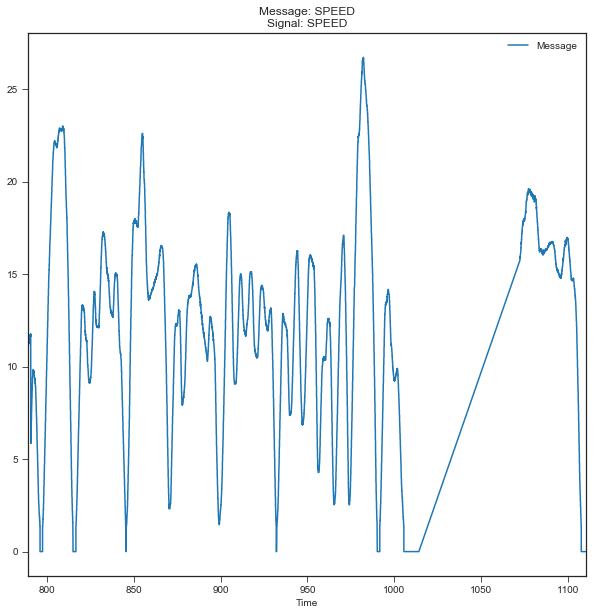

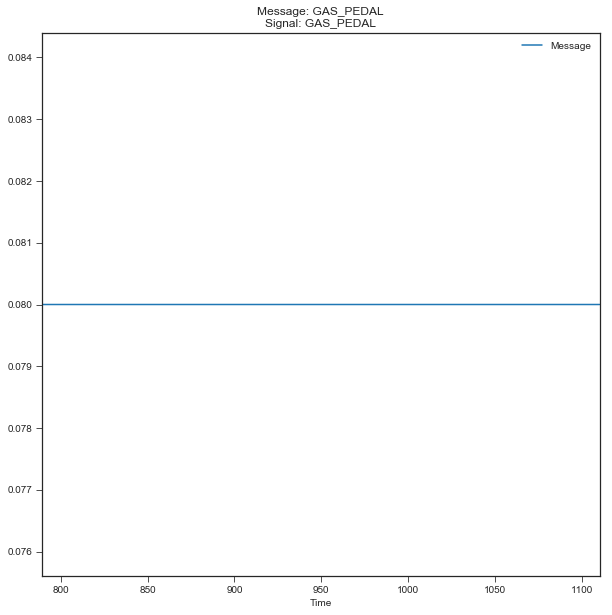

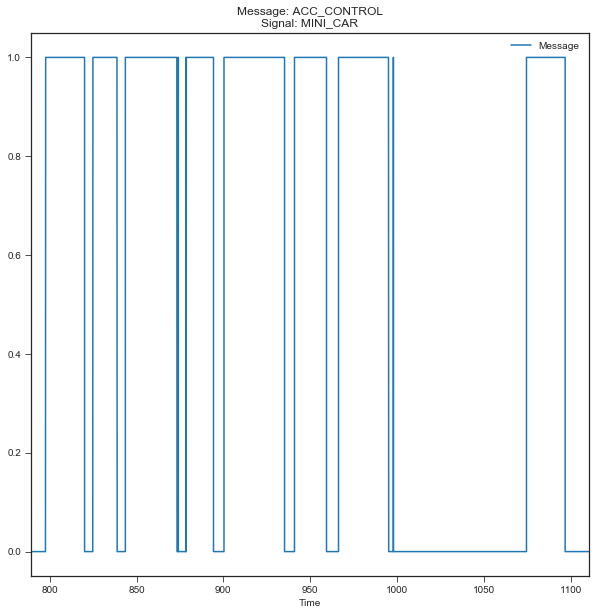

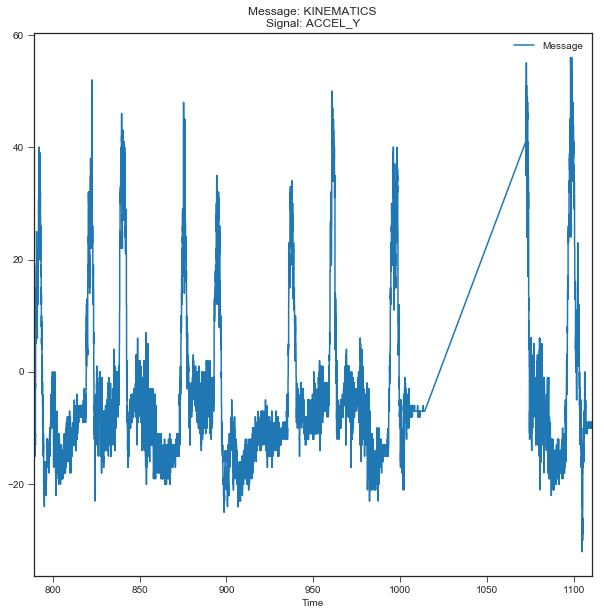

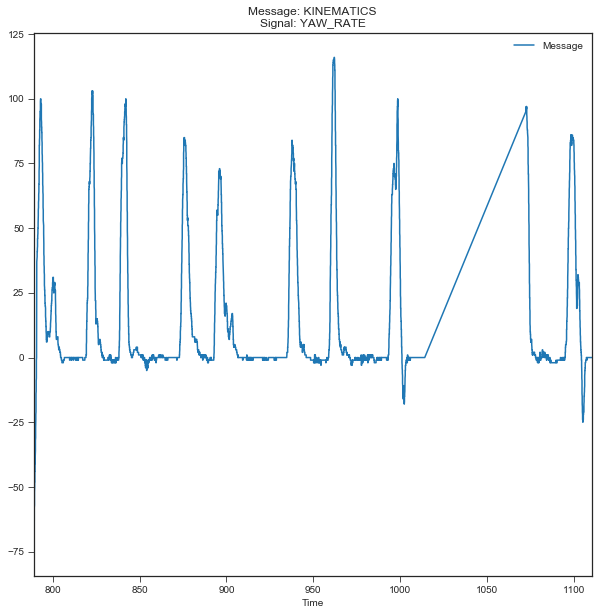

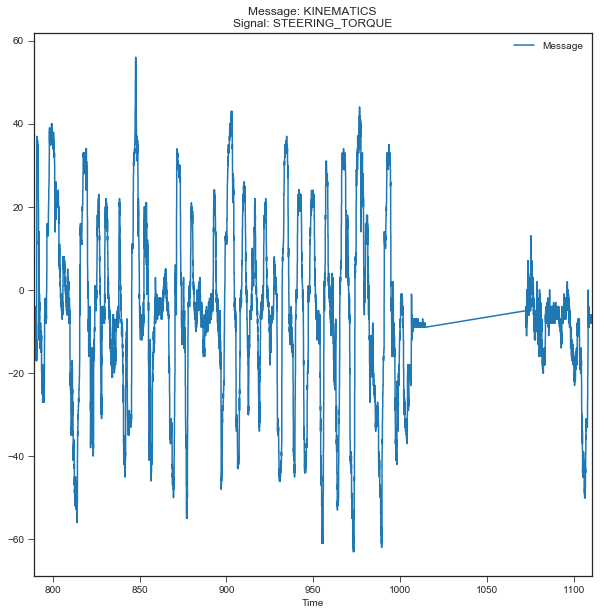

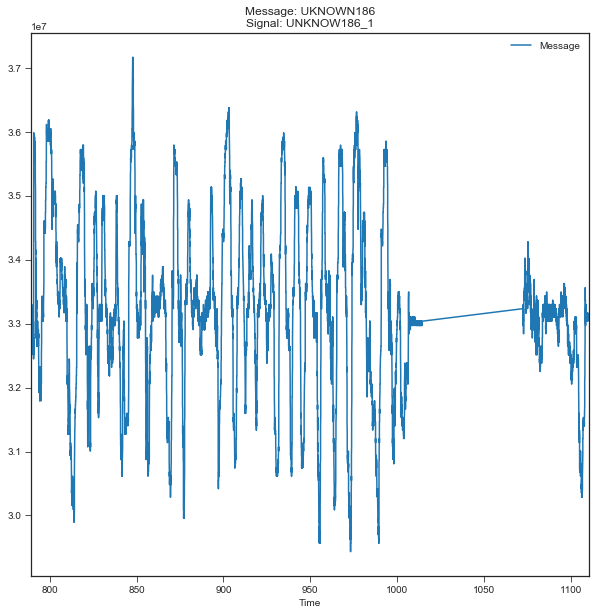

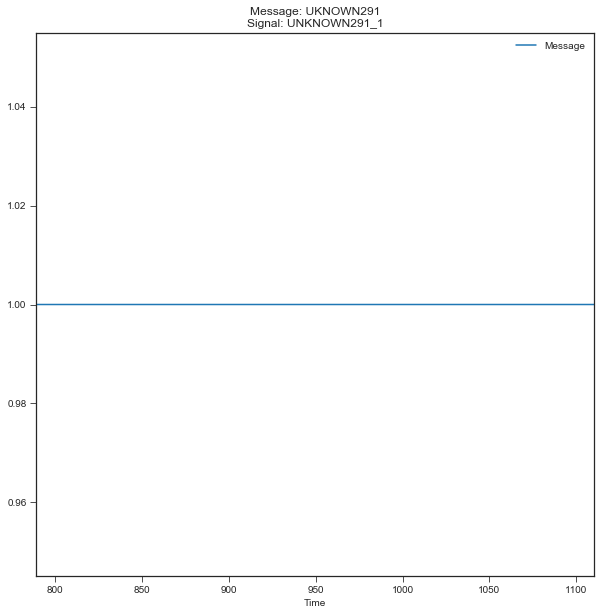

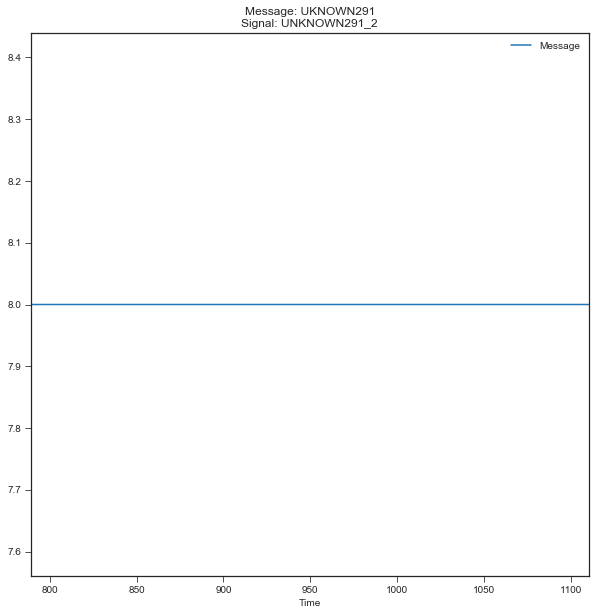

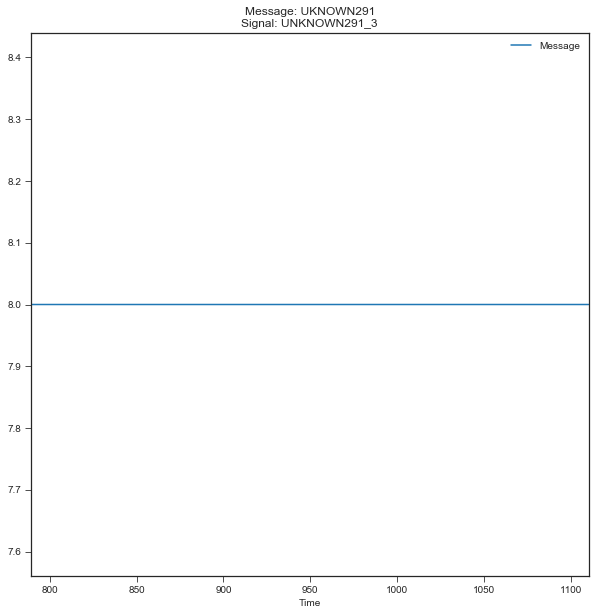

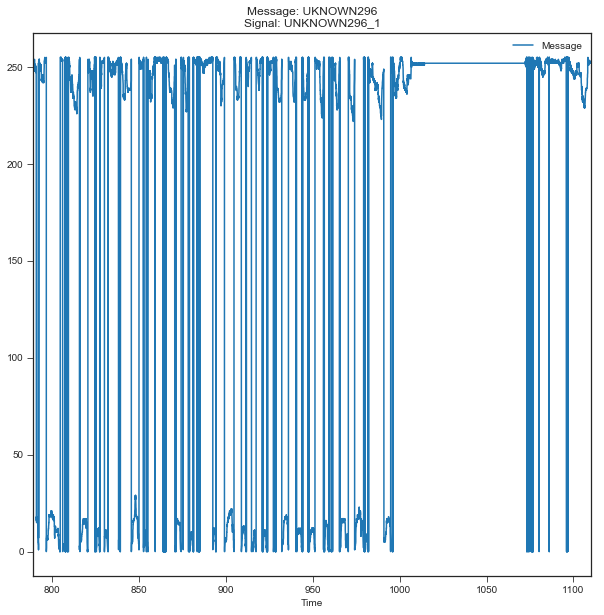

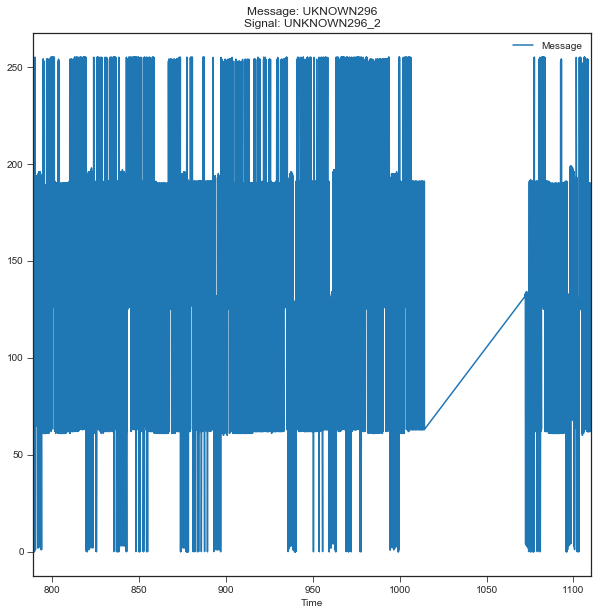

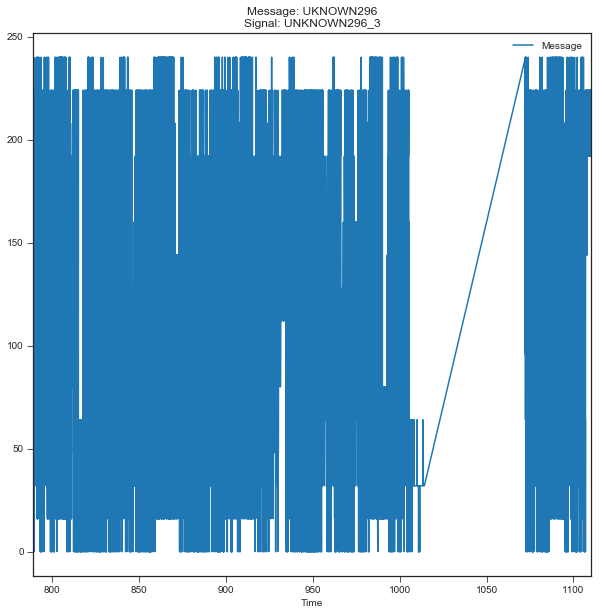

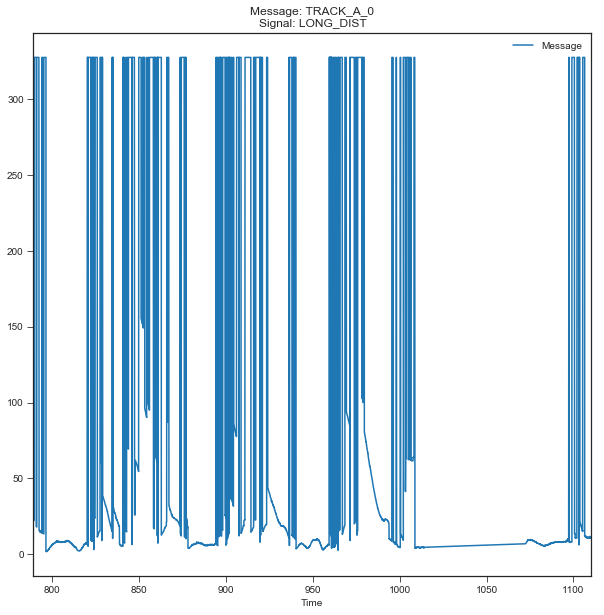

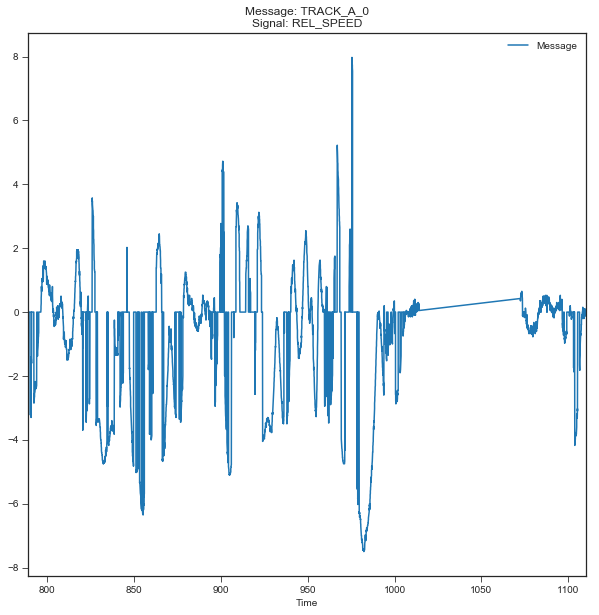

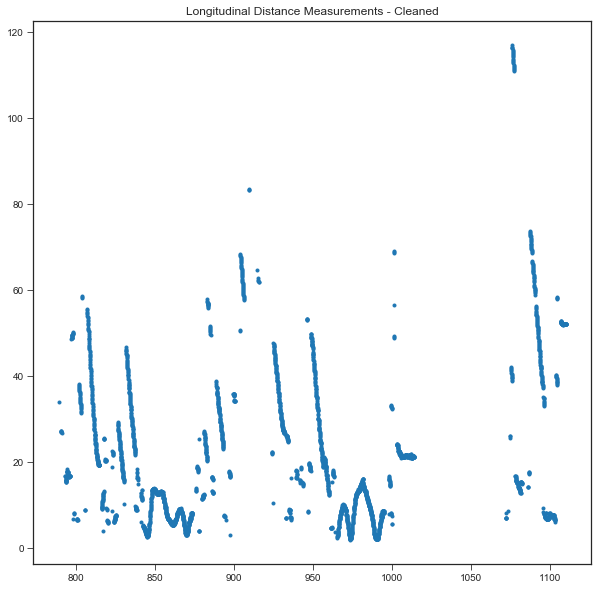

In [51]:

# %% Plot the speed of the vehicle:
DBC.plotDBC('SPEED',1,can_data,db_file)

DBC.plotDBC('GAS_PEDAL',0,can_data,db_file)


DBC.plotDBC('ACC_CONTROL',2,can_data,db_file)


DBC.plotDBC('KINEMATICS',-1,can_data,db_file)

DBC.plotDBC('KINEMATICS',0,can_data,db_file)

DBC.plotDBC('KINEMATICS',1,can_data,db_file)

DBC.plotDBC('UKNOWN186',0,can_data,db_file)


DBC.plotDBC('UKNOWN291',0,can_data,db_file)
DBC.plotDBC('UKNOWN291',1,can_data,db_file)
DBC.plotDBC('UKNOWN291',2,can_data,db_file)

DBC.plotDBC('UKNOWN296',0,can_data,db_file)
DBC.plotDBC('UKNOWN296',1,can_data,db_file)
DBC.plotDBC('UKNOWN296',2,can_data,db_file)


#DBC.plotDBC('ACCELEROMETER', 0, can_data, db_file)

# %% Plot the estimated longitudonal radar measurements for track 0 and its relative speed:
DBC.plotDBC('TRACK_A_0',1,can_data,db_file)


DBC.plotDBC('TRACK_A_0',4,can_data,db_file)
# Note: Change the track number (for instance to TRACK_A_0) to see what other
# tracks are reporting.

# %% Clean and plot the distance measurements a bit:

# Extract data as a numpy array:
Distance_Data = DBC.getNumpyData('TRACK_A_1',1,can_data,db_file)
Rel_Speed_Data = DBC.getNumpyData('TRACK_A_1',4,can_data,db_file)
# This filters out distance measurements over 300:
Distance_Data = DBC.cleanDistanceData(Distance_Data)

print('Data Cleaned')
# %% Plot Cleaned Distance:
pt.figure()
pt.plot(Distance_Data[:,0],Distance_Data[:,1],'.')
pt.title('Longitudinal Distance Measurements - Cleaned')

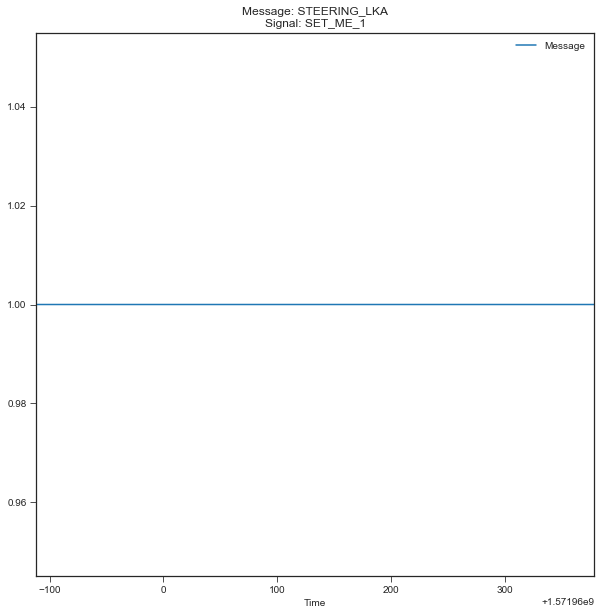

In [64]:
DBC.plotDBC('STEERING_LKA',0,can_data,db_file)

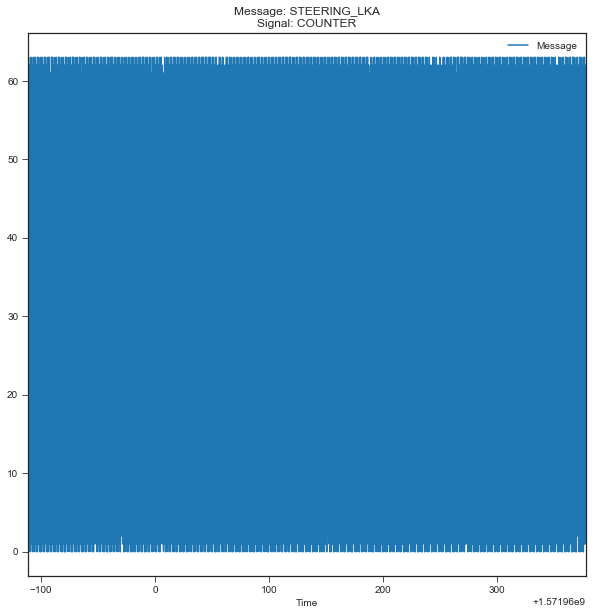

In [65]:
DBC.plotDBC('STEERING_LKA',1,can_data,db_file)

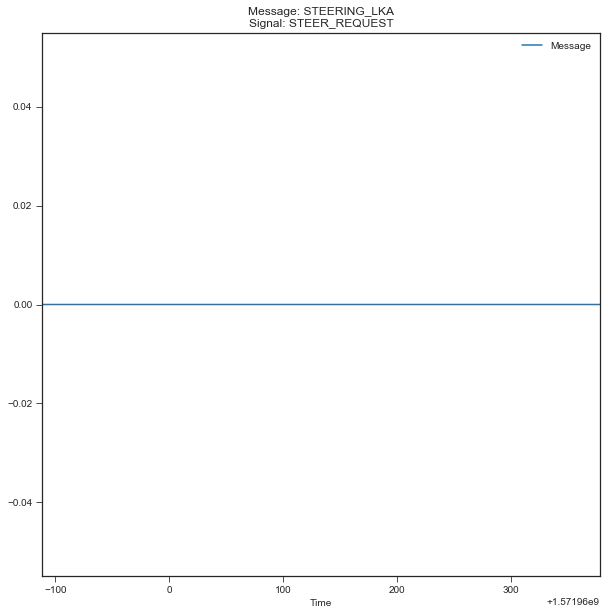

In [66]:
DBC.plotDBC('STEERING_LKA',2,can_data,db_file)

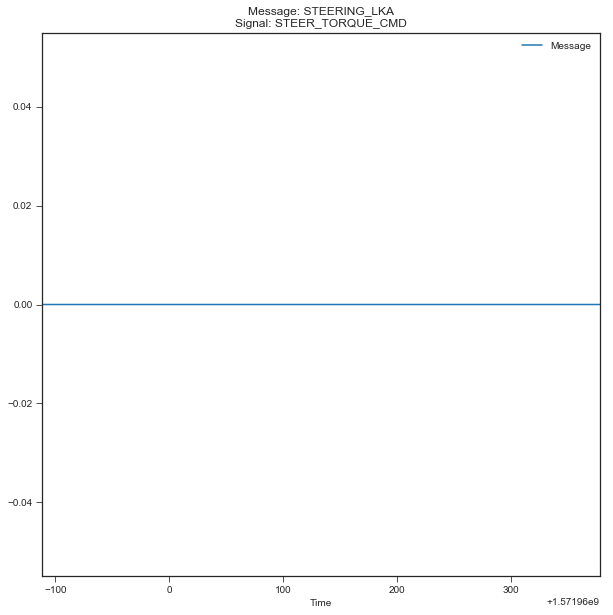

In [67]:
DBC.plotDBC('STEERING_LKA',3,can_data,db_file)

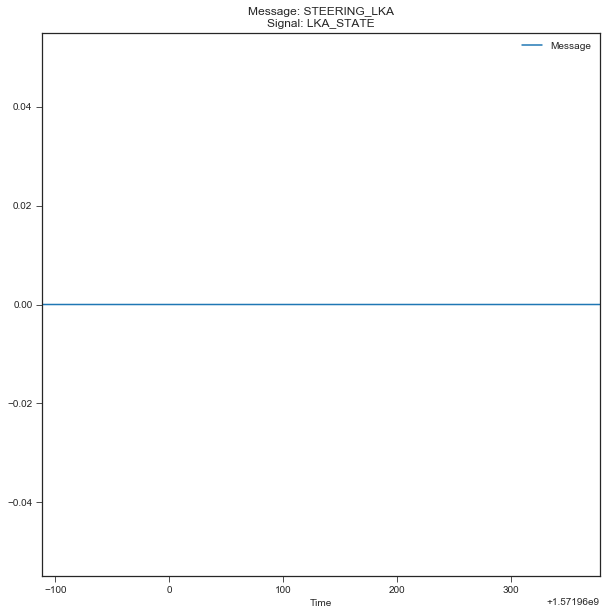

In [68]:
DBC.plotDBC('STEERING_LKA',4,can_data,db_file)